In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Load Data 

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [6]:
df = pd.read_csv(path, names = headernames)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

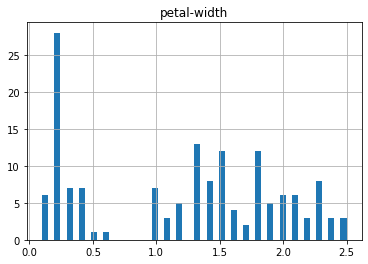

In [7]:
df.hist(column='petal-width', bins=50)

### Feature set


To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [9]:
X = df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']] .values  #.astype(float)
X[0:5]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

What are our labels?


In [10]:
y = df['Class'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

## Normalize Data


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


<div id="classification">
    <h2>Classification</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

<details><summary>Click here for the solution</summary>

```python
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

```

</details>


In [16]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333])

#### Plot the model accuracy for a different number of neighbors.


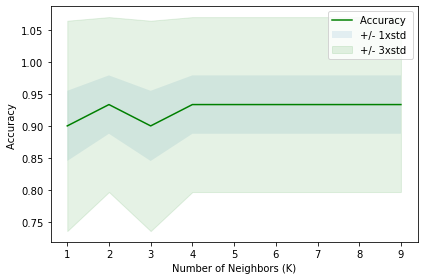

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9333333333333333 with k= 2


In [19]:
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.975
Test set Accuracy:  0.9333333333333333
